# Fourier Series Approximation

## 1. Introduction

A **Fourier Series** is a way to represent a periodic function as a sum of simple sine and cosine waves. It is a fundamental concept in signal processing, physics, and engineering.

Any periodic function $f(t)$ with period $T$ can be approximated by:

$$
f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ a_n \cos\left(\frac{2\pi n t}{T}\right) + b_n \sin\left(\frac{2\pi n t}{T}\right) \right]
$$

where the coefficients $a_0$, $a_n$, and $b_n$ are calculated integrals of the function.


## 2. Calculating Coefficients

For a function $f(t)$ defined on the interval $[t_0, t_0 + T]$:

1.  **DC Component ($a_0$):**
    $$ a_0 = \frac{2}{T} \int_{t_0}^{t_0 + T} f(t) \, dt $$

2.  **Cosine Coefficients ($a_n$):**
    $$ a_n = \frac{2}{T} \int_{t_0}^{t_0 + T} f(t) \cos\left(\frac{2\pi n t}{T}\right) \, dt $$

3.  **Sine Coefficients ($b_n$):**
    $$ b_n = \frac{2}{T} \int_{t_0}^{t_0 + T} f(t) \sin\left(\frac{2\pi n t}{T}\right) \, dt $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Set style for better looking plots
plt.style.use('seaborn-v0_8-whitegrid')

## 3. Implementation from Scratch

We will implement a class `FourierSeries` that takes a function and computes its series approximation numerically using `scipy.integrate.quad`. This allows us to approximate *any* python function, not just those with simple analytical integrals.

In [2]:
class FourierSeries:
    def __init__(self, func, T, t0=0, num_terms=10):
        """
        Initialize the Fourier Series calculator.
        
        Args:
            func (callable): The periodic function f(t) to approximate.
            T (float): The period of the function.
            t0 (float): The starting time of the period (default 0).
            num_terms (int): Number of harmonics to calculate.
        """
        self.func = func
        self.T = T
        self.t0 = t0
        self.num_terms = num_terms
        self.a0 = 0.0
        self.an = []
        self.bn = []
        self.calculate_coefficients()
        
    def calculate_coefficients(self):
        """Calculates a0, an, and bn using numerical integration."""
        omega = 2 * np.pi / self.T
        
        # Calculate a0
        integrand_a0 = lambda t: self.func(t)
        self.a0, _ = quad(integrand_a0, self.t0, self.t0 + self.T)
        self.a0 *= (2 / self.T)
        
        self.an = []
        self.bn = []
        
        for n in range(1, self.num_terms + 1):
            # Calculate an
            integrand_an = lambda t: self.func(t) * np.cos(n * omega * t)
            val_an, _ = quad(integrand_an, self.t0, self.t0 + self.T)
            self.an.append(val_an * (2 / self.T))
            
            # Calculate bn
            integrand_bn = lambda t: self.func(t) * np.sin(n * omega * t)
            val_bn, _ = quad(integrand_bn, self.t0, self.t0 + self.T)
            self.bn.append(val_bn * (2 / self.T))
            
    def approximate(self, t_vals):
        """Reconstructs the function using the calculated coefficients."""
        omega = 2 * np.pi / self.T
        result = np.full_like(t_vals, self.a0 / 2.0)
        
        for n in range(1, self.num_terms + 1):
            # Note: an and bn are 0-indexed, so n-th harmonic is at index n-1
            result += self.an[n-1] * np.cos(n * omega * t_vals) + \
                      self.bn[n-1] * np.sin(n * omega * t_vals)
        
        return result

## 4. Examples

### Example 1: Square Wave

A standard square wave is defined as:
$$ f(t) = \begin{cases} 1 & 0 \le t < T/2 \\ -1 & T/2 \le t < T \end{cases} $$

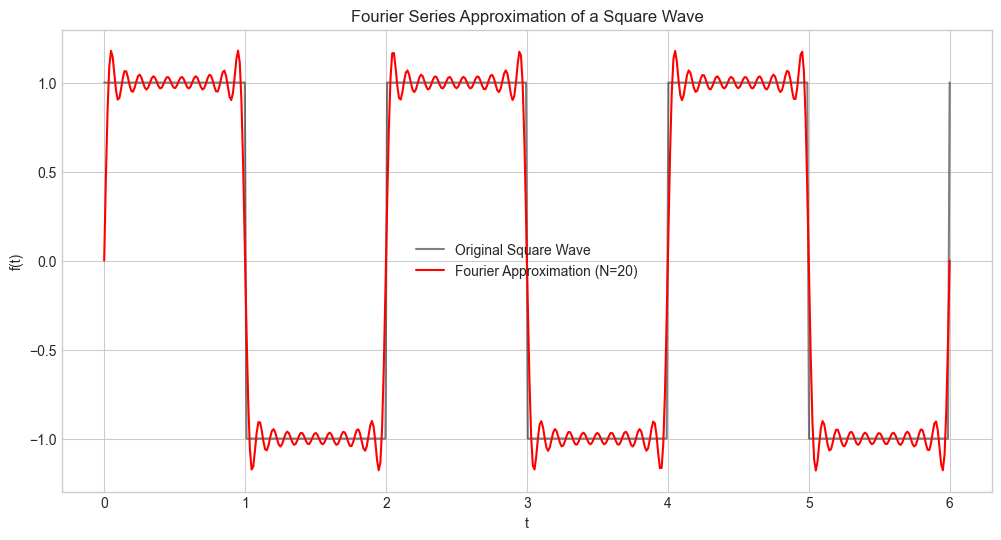

In [3]:
# Define Square Wave Function
def square_wave(t, T=2.0):
    # modulo T to make it periodic
    t_mod = t % T
    if t_mod < T/2:
        return 1.0
    else:
        return -1.0

# Parameters
T = 2.0
fs_square = FourierSeries(lambda t: square_wave(t, T), T=T, num_terms=20)

# Generate Plot points
t_vals = np.linspace(0, 3*T, 500) # Plot 3 periods
y_approx = fs_square.approximate(t_vals)
y_real = [square_wave(t, T) for t in t_vals]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t_vals, y_real, 'k', label='Original Square Wave', alpha=0.5)
plt.plot(t_vals, y_approx, 'r', label='Fourier Approximation (N=20)')
plt.title('Fourier Series Approximation of a Square Wave')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

### Example 2: Sawtooth Wave

A sawtooth wave increases linearly from -1 to 1.

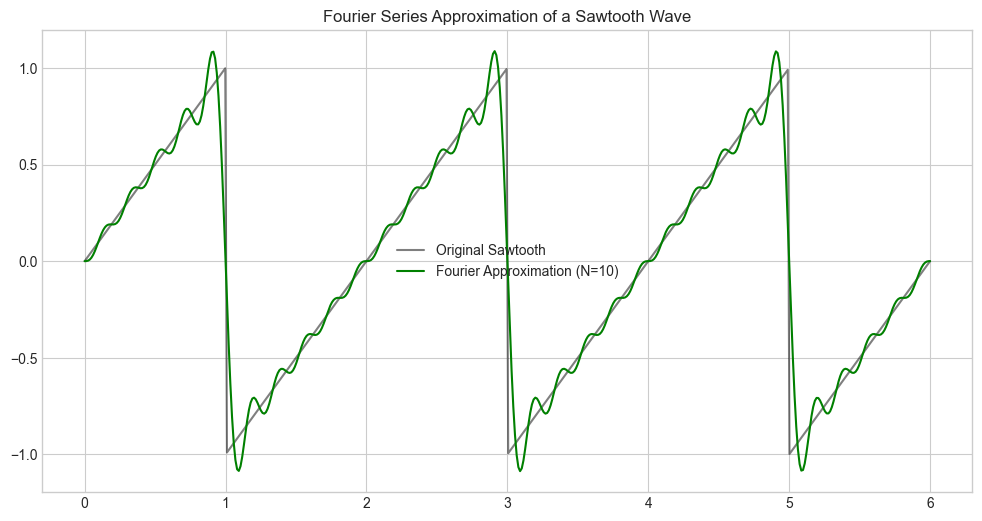

In [4]:
# Define Sawtooth Function
def sawtooth_wave(t, T=2.0):
    # Scale t to be between -1 and 1 over period T
    return 2 * (t / T - np.floor(t / T + 0.5))

T = 2.0
fs_saw = FourierSeries(lambda t: sawtooth_wave(t, T), T=T, num_terms=10)

y_approx_saw = fs_saw.approximate(t_vals)
y_real_saw = [sawtooth_wave(t, T) for t in t_vals]

plt.figure(figsize=(12, 6))
plt.plot(t_vals, y_real_saw, 'k', label='Original Sawtooth', alpha=0.5)
plt.plot(t_vals, y_approx_saw, 'g', label='Fourier Approximation (N=10)')
plt.title('Fourier Series Approximation of a Sawtooth Wave')
plt.legend()
plt.show()

## 5. Convergence Analysis

Let's visualize how the approximation improves as we add more terms.

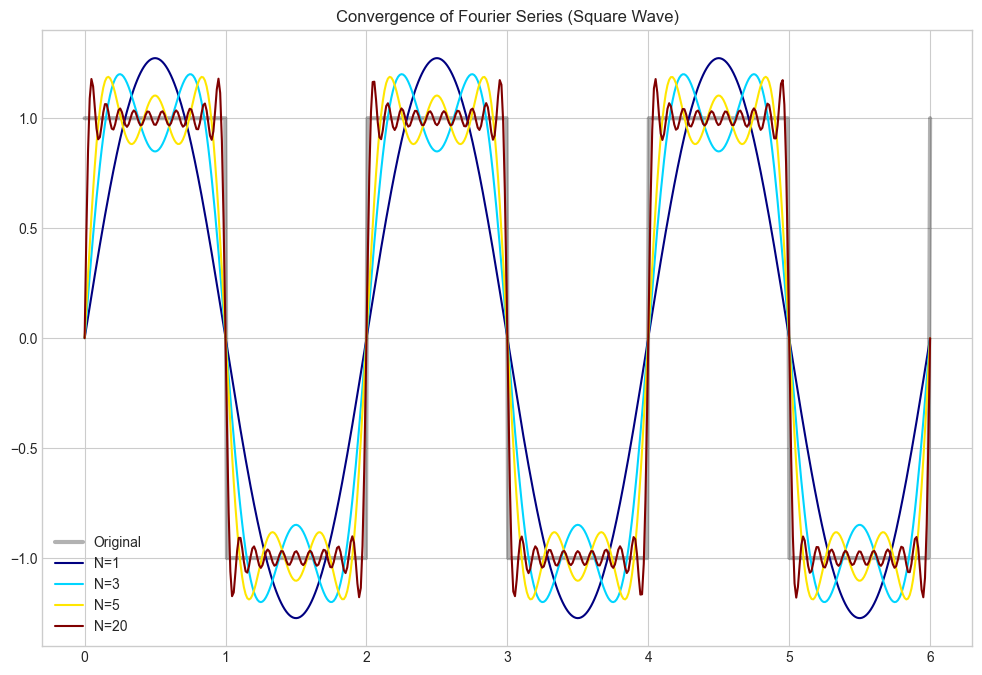

In [ ]:
# Using the stored coefficients from the Square Wave example
plt.figure(figsize=(12, 8))
plt.plot(t_vals, y_real, 'k', label='Original', alpha=0.3, linewidth=3)

term_counts = [1, 3, 5, 20]
colors = plt.cm.jet(np.linspace(0, 1, len(term_counts)))

for i, n_terms in enumerate(term_counts):
    # Temporarily set num_terms
    fs_square.num_terms = n_terms
    # We don't need to recalculate coefficients, just use the first N
    y_partial = fs_square.approximate(t_vals)
    plt.plot(t_vals, y_partial, label=f'N={n_terms}', color=colors[i])

plt.title('Convergence of Fourier Series (Square Wave)')
plt.legend()
plt.show() 

## 6. Symbolic Approach (SymPy)

For exact analytical solutions, we can use SymPy.

In [6]:
import sympy as sp

x = sp.symbols('x')
k = sp.symbols('k', integer=True)

# Define function: Square wave
# 1 from 0 to 1, -1 from 1 to 2. Period L=2.
L = 2
f = sp.Piecewise((1, (x > 0) & (x < 1)), (-1, (x > 1) & (x < 2)))

# Coefficients
a0 = (2/L) * sp.integrate(f, (x, 0, L))
an = (2/L) * sp.integrate(f * sp.cos(2*sp.pi*k*x/L), (x, 0, L))
bn = (2/L) * sp.integrate(f * sp.sin(2*sp.pi*k*x/L), (x, 0, L))

print(f"a0 = {a0}")
print(f"an = {an}")
print(f"bn = {bn}")

# Construct series (first 5 terms)
fs_sym = a0/2 + sp.Sum(an * sp.cos(2*sp.pi*k*x/L) + bn * sp.sin(2*sp.pi*k*x/L), (k, 1, 5)).doit()
display(fs_sym)

a0 = 0
an = 0
bn = 1.0*Piecewise((-2*(-1)**k/(pi*k) + 2/(pi*k), Ne(k, 0)), (0, True))


4.0*sin(pi*x)/pi + 1.33333333333333*sin(3*pi*x)/pi + 0.8*sin(5*pi*x)/pi